In [2]:
import pandas as pd
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib.pyplot import figure

In [3]:
###listing all discussion files
f_discs = sorted(glob('Documents\\Discussion_data\\Discussion-*.csv'))
f_discs
len(f_discs)

1952

In [4]:
d_comm = pd.concat((pd.read_csv(file).assign(filename=file)
         for file in f_discs), ignore_index = True)

In [5]:
d_comm.to_csv('out.csv')

In [6]:
d_comm

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,filename
0,NaN,67718,"May 04, 2018 10:40AM",Can We Live Without Concrete?,\n\t\t\t\n\t\t \t\n\t\t\t\tA combination of ce...,msmash,NaN,NaN,Documents\Discussion_data\Discussion-00067718.csv
1,67718.0,56553764,"May 04, 2018 10:46AM",Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5.0,Funny,Documents\Discussion_data\Discussion-00067718.csv
2,56554030.0,56557952,"May 05, 2018 01:37AM",Re: Lucy says No!,"The Roman Empire spoke Latin, and australopit...",4603733,2.0,NaN,Documents\Discussion_data\Discussion-00067718.csv
3,56554452.0,56560658,"May 05, 2018 06:02PM",Re:Jimmy Hoffa embedded in Trump tower basement,He fell to pieces... in an auto scrapyard.htt...,864834,1.0,NaN,Documents\Discussion_data\Discussion-00067718.csv
4,56553764.0,56555786,"May 04, 2018 03:54PM",Re:Jimmy Hoffa says Yes!,Can't decide which sounds worse: concrete sho...,1233630,2.0,NaN,Documents\Discussion_data\Discussion-00067718.csv
...,...,...,...,...,...,...,...,...,...
509763,48988783.0,48996211,"February 06, 2015 04:04AM",Re:Say what you will about the south.,It's true that a lot of anti-vax sentiment is...,807394,2.0,NaN,Documents\Discussion_data\Discussion-9999029.csv
509764,9999029.0,48989487,"February 05, 2015 12:17PM",Arm Bans for Un-Vaccinated.,I think people who don't have vaccinations sh...,658721,1.0,NaN,Documents\Discussion_data\Discussion-9999029.csv
509765,9999029.0,48990889,"February 05, 2015 02:18PM",A solution to the problem,People who refuse to vaccinate (either themse...,574360,1.0,NaN,Documents\Discussion_data\Discussion-9999029.csv
509766,9999029.0,48992651,"February 05, 2015 04:58PM",Way Back,In 1951 and 52 I had compulsory vacin...,3430529,2.0,NaN,Documents\Discussion_data\Discussion-9999029.csv


In [7]:
d_comm.head()

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,filename
0,NaN,67718,"May 04, 2018 10:40AM",Can We Live Without Concrete?,\n\t\t\t\n\t\t \t\n\t\t\t\tA combination of ce...,msmash,NaN,NaN,Documents\Discussion_data\Discussion-00067718.csv
1,67718.0,56553764,"May 04, 2018 10:46AM",Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5.0,Funny,Documents\Discussion_data\Discussion-00067718.csv
2,56554030.0,56557952,"May 05, 2018 01:37AM",Re: Lucy says No!,"The Roman Empire spoke Latin, and australopit...",4603733,2.0,NaN,Documents\Discussion_data\Discussion-00067718.csv
3,56554452.0,56560658,"May 05, 2018 06:02PM",Re:Jimmy Hoffa embedded in Trump tower basement,He fell to pieces... in an auto scrapyard.htt...,864834,1.0,NaN,Documents\Discussion_data\Discussion-00067718.csv
4,56553764.0,56555786,"May 04, 2018 03:54PM",Re:Jimmy Hoffa says Yes!,Can't decide which sounds worse: concrete sho...,1233630,2.0,NaN,Documents\Discussion_data\Discussion-00067718.csv


In [8]:
d_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509768 entries, 0 to 509767
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Parent ID   507816 non-null  float64
 1   Comment ID  509768 non-null  int64  
 2   Timestamp   509768 non-null  object 
 3   Title       509765 non-null  object 
 4   Text        509768 non-null  object 
 5   Author ID   509529 non-null  object 
 6   Score       507816 non-null  float64
 7   Category    70346 non-null   object 
 8   filename    509768 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.0+ MB


In [9]:
## Converting float type columns into int
d_comm['Parent ID'] = d_comm['Parent ID'].astype(float).astype('Int64')
d_comm['Score'] = d_comm['Score'].astype(float).astype('Int64')

In [10]:
d_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509768 entries, 0 to 509767
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Parent ID   507816 non-null  Int64 
 1   Comment ID  509768 non-null  int64 
 2   Timestamp   509768 non-null  object
 3   Title       509765 non-null  object
 4   Text        509768 non-null  object
 5   Author ID   509529 non-null  object
 6   Score       507816 non-null  Int64 
 7   Category    70346 non-null   object
 8   filename    509768 non-null  object
dtypes: Int64(2), int64(1), object(6)
memory usage: 36.0+ MB


In [11]:
d_comm.head()

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,filename
0,<NA>,67718,"May 04, 2018 10:40AM",Can We Live Without Concrete?,\n\t\t\t\n\t\t \t\n\t\t\t\tA combination of ce...,msmash,<NA>,NaN,Documents\Discussion_data\Discussion-00067718.csv
1,67718,56553764,"May 04, 2018 10:46AM",Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Documents\Discussion_data\Discussion-00067718.csv
2,56554030,56557952,"May 05, 2018 01:37AM",Re: Lucy says No!,"The Roman Empire spoke Latin, and australopit...",4603733,2,NaN,Documents\Discussion_data\Discussion-00067718.csv
3,56554452,56560658,"May 05, 2018 06:02PM",Re:Jimmy Hoffa embedded in Trump tower basement,He fell to pieces... in an auto scrapyard.htt...,864834,1,NaN,Documents\Discussion_data\Discussion-00067718.csv
4,56553764,56555786,"May 04, 2018 03:54PM",Re:Jimmy Hoffa says Yes!,Can't decide which sounds worse: concrete sho...,1233630,2,NaN,Documents\Discussion_data\Discussion-00067718.csv


In [12]:
### Conversation-level analysis
dfc = d_comm.pivot_table(index = ['filename'], aggfunc ='size')
print(' Average number of comments :', dfc.mean())
print(' Minimum number of comments :', dfc.min())
print(' Maximum number of comments :', dfc.max())

 Average number of comments : 261.1516393442623
 Minimum number of comments : 101
 Maximum number of comments : 864


In [13]:
## percentage of null values in each column
(d_comm.apply(pd.isnull).mean())*100

Parent ID      0.382919
Comment ID     0.000000
Timestamp      0.000000
Title          0.000589
Text           0.000000
Author ID      0.046884
Score          0.382919
Category      86.200389
filename       0.000000
dtype: float64

In [14]:
### Checking null values when grouped by each discussion
dfl = d_comm[d_comm['Category'].isnull()]
dfl1 = dfl.pivot_table(index = ['filename'], aggfunc ='size')
print(' Average number of comments with no category in a discussion :', dfl1.mean())
print(' Minimum number of comments with no category in a discussion :', dfl1.min())
print(' Maximum number of comments with no category in a discussion :', dfl1.max())

 Average number of comments with no category in a discussion : 225.1137295081967
 Minimum number of comments with no category in a discussion : 70
 Maximum number of comments with no category in a discussion : 809


In [15]:
## Deleting not required filename column from dataframe
del(d_comm['filename'])

In [16]:
d_comm.head()

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category
0,<NA>,67718,"May 04, 2018 10:40AM",Can We Live Without Concrete?,\n\t\t\t\n\t\t \t\n\t\t\t\tA combination of ce...,msmash,<NA>,NaN
1,67718,56553764,"May 04, 2018 10:46AM",Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny
2,56554030,56557952,"May 05, 2018 01:37AM",Re: Lucy says No!,"The Roman Empire spoke Latin, and australopit...",4603733,2,NaN
3,56554452,56560658,"May 05, 2018 06:02PM",Re:Jimmy Hoffa embedded in Trump tower basement,He fell to pieces... in an auto scrapyard.htt...,864834,1,NaN
4,56553764,56555786,"May 04, 2018 03:54PM",Re:Jimmy Hoffa says Yes!,Can't decide which sounds worse: concrete sho...,1233630,2,NaN


In [17]:
### calculating % of comments with and without categories
percent_missing = d_comm['Category'].isnull().sum() * 100 / len(d_comm['Category'])
print("Percentage of comments not assigned with categories :", percent_missing)
print("Percentage of comments assigned with categories :", 100-percent_missing)

Percentage of comments not assigned with categories : 86.20038919665416
Percentage of comments assigned with categories : 13.799610803345843


Text(0, 0.5, 'Counts of Comments')

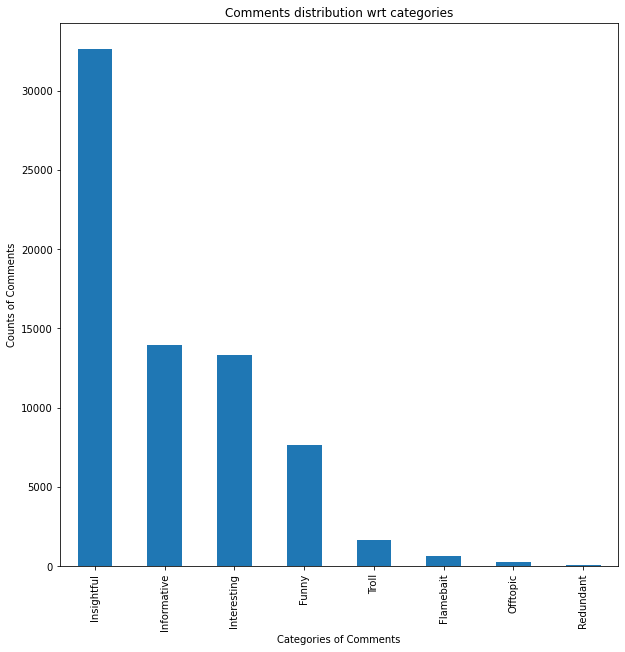

In [18]:
### Entity representation wrt the count
ax = d_comm["Category"].value_counts().plot(kind="bar", figsize=(10,10), x='Category', title='Comments distribution wrt categories')
ax.set_xlabel("Categories of Comments")
ax.set_ylabel("Counts of Comments")

Data Looks imbalanced with around 50% of the comments are categorised as insightful out of 8 categories where redundant and offtopic category do have negligiable comments.

In [19]:
### count of comments with no category.
nan_cat = d_comm['Category'].isna().sum()
print('Total comments without any catgeory =', nan_cat)

Total comments without any catgeory = 439422


In [20]:
d_comm['Timestamp'] = d_comm['Timestamp'].str.replace('Mday ', '')

In [21]:
d_comm['Timestamp'] = pd.to_datetime(d_comm['Timestamp'], format='%B %d, %Y %H:%M%p')

In [22]:
d_comm.head()

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category
0,<NA>,67718,2018-05-04 10:40:00,Can We Live Without Concrete?,\n\t\t\t\n\t\t \t\n\t\t\t\tA combination of ce...,msmash,<NA>,NaN
1,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny
2,56554030,56557952,2018-05-05 01:37:00,Re: Lucy says No!,"The Roman Empire spoke Latin, and australopit...",4603733,2,NaN
3,56554452,56560658,2018-05-05 06:02:00,Re:Jimmy Hoffa embedded in Trump tower basement,He fell to pieces... in an auto scrapyard.htt...,864834,1,NaN
4,56553764,56555786,2018-05-04 03:54:00,Re:Jimmy Hoffa says Yes!,Can't decide which sounds worse: concrete sho...,1233630,2,NaN


In [23]:
d_comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509768 entries, 0 to 509767
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Parent ID   507816 non-null  Int64         
 1   Comment ID  509768 non-null  int64         
 2   Timestamp   509768 non-null  datetime64[ns]
 3   Title       509765 non-null  object        
 4   Text        509768 non-null  object        
 5   Author ID   509529 non-null  object        
 6   Score       507816 non-null  Int64         
 7   Category    70346 non-null   object        
dtypes: Int64(2), datetime64[ns](1), int64(1), object(4)
memory usage: 32.1+ MB


In [24]:
d_comm['Weekday'] = d_comm['Timestamp'].dt.day_name()

In [25]:
d_comm.head()

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday
0,<NA>,67718,2018-05-04 10:40:00,Can We Live Without Concrete?,\n\t\t\t\n\t\t \t\n\t\t\t\tA combination of ce...,msmash,<NA>,NaN,Friday
1,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Friday
2,56554030,56557952,2018-05-05 01:37:00,Re: Lucy says No!,"The Roman Empire spoke Latin, and australopit...",4603733,2,NaN,Saturday
3,56554452,56560658,2018-05-05 06:02:00,Re:Jimmy Hoffa embedded in Trump tower basement,He fell to pieces... in an auto scrapyard.htt...,864834,1,NaN,Saturday
4,56553764,56555786,2018-05-04 03:54:00,Re:Jimmy Hoffa says Yes!,Can't decide which sounds worse: concrete sho...,1233630,2,NaN,Friday


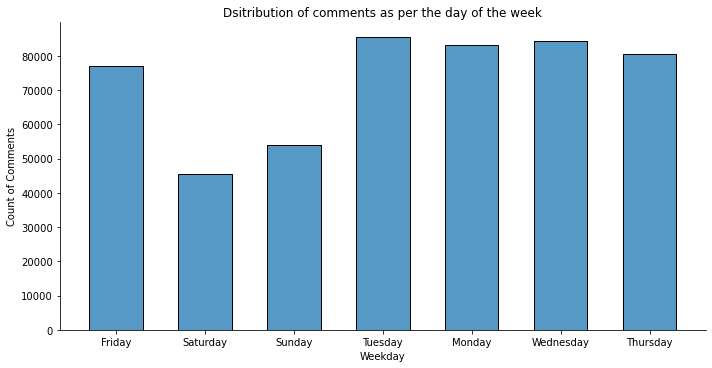

In [26]:
gfg = sns.displot(d_comm['Weekday'], shrink= .6, fill=True, binwidth=3,aspect=2)
gfg.set(xlabel ="Weekday", ylabel = "Count of Comments", title ='Dsitribution of comments as per the day of the week')

In [27]:
dfa = d_comm.pivot_table(index = ['Author ID'], aggfunc ='size')
dfa

Author ID
 100005        17
 1000150        1
 1000167        5
 10002888       1
 1000364        1
             ... 
samzenpus     155
timothy       160
tm            140
twg            11
yaelk           4
Length: 20403, dtype: int64

In [28]:
dft = dfa.tail(25).reset_index()
dft

,Author ID,0
0,BeauHD,640
1,CiH,1
2,David Trout,1
3,EditorDavid,304
4,PopeRatzo,1
5,Professor,1
6,R,81
7,RET,1
8,Roblimo,2
9,Soulskill,192


In [29]:
dft.drop(index=dft.index[14], axis=0, inplace=True)
dft = dft.rename(columns={0: 'Count of Comments'})
dft = dft.sort_values(['Count of Comments'], ascending=[False])
dft.set_index("Author ID",drop=True,inplace=True)

In [30]:
dft

,Count of Comments
Author ID,
BeauHD,640
msmash,488
EditorDavid,304
Soulskill,192
timothy,160
samzenpus,155
tm,140
R,81
i pi,12


Text(0, 0.5, 'No. of topics initated')

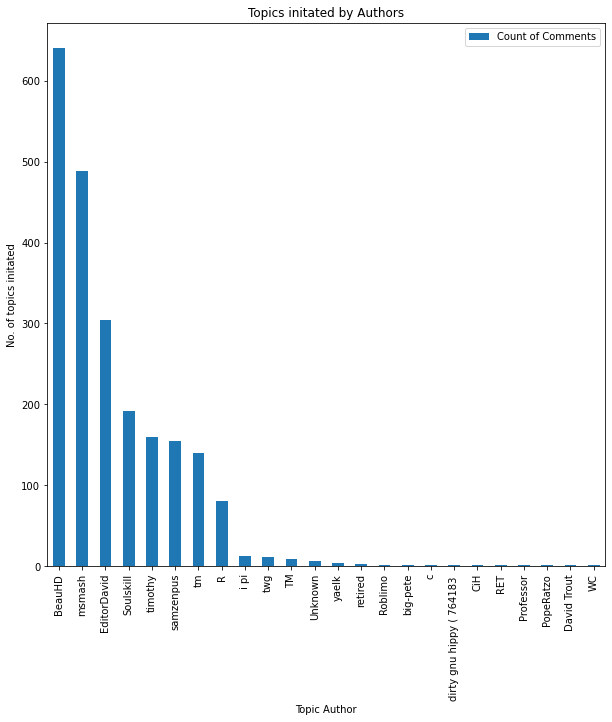

In [31]:
aff = dft.plot(kind='bar',figsize=(10,10), title='Topics initated by Authors')
aff.set_xlabel("Topic Author")
aff.set_ylabel("No. of topics initated")

In [32]:
print(' Average number of comments/ posts by author is', dfa.mean())
print(' Median of comments/ posts by author is', dfa.median())
print(' Mode of comments/ posts by author is', dfa.mode())

 Average number of comments/ posts by author is 24.97323922952507
 Median of comments/ posts by author is 2.0
 Mode of comments/ posts by author is 0    1
dtype: int64


In [33]:
print(' Min number of comments/ posts by author is', dfa.min())
print(' Max number of comments/ posts by author is', dfa.max())

 Min number of comments/ posts by author is 1
 Max number of comments/ posts by author is 22942


In [35]:
dfn = d_comm.dropna()
dfn

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday
1,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Friday
9,67718,56553822,2018-05-04 10:59:00,"Yes, there is an alternative",Hemp is a good alternative to concrete. In ad...,697113,5,Funny,Friday
10,56553822,56553934,2018-05-04 11:15:00,"Re:Yes, there is an alternative","HEMP? I got to ask, do you have a pretensione...",2522392,5,Insightful,Friday
11,56553934,56554078,2018-05-04 11:33:00,"Re:Yes, there is an alternative",Turns out there is a product called 'Hempcret...,4808835,5,Informative,Friday
12,56554078,56554136,2018-05-04 11:40:00,"Re:Yes, there is an alternative",Hempcrete will float in a bucket of waterWith...,1198475,4,Insightful,Friday
...,...,...,...,...,...,...,...,...,...
509730,48987949,48988153,2015-02-05 10:09:00,Re:so...,Hep B can be contracted in many ways. The he...,267028,5,Informative,Thursday
509738,48988033,48988165,2015-02-05 10:11:00,"Re:Not 5 vaccines, 7-11","By ""moderate anti-vaxxer"", you mean ""I've got...",3897945,5,Insightful,Thursday
509745,48988033,48988229,2015-02-05 10:18:00,"Re:Not 5 vaccines, 7-11","""I'm a moderate anti-vaxxer""In other words, y...",by Anonymous Cowar,2,Insightful,Thursday
509747,48988555,48989039,2015-02-05 11:35:00,"Re:Not 5 vaccines, 7-11",I can see waiting on Varicella until around a...,by Anonymous Cowar,2,Interesting,Thursday


In [36]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70316 entries, 1 to 509753
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Parent ID   70316 non-null  Int64         
 1   Comment ID  70316 non-null  int64         
 2   Timestamp   70316 non-null  datetime64[ns]
 3   Title       70316 non-null  object        
 4   Text        70316 non-null  object        
 5   Author ID   70316 non-null  object        
 6   Score       70316 non-null  Int64         
 7   Category    70316 non-null  object        
 8   Weekday     70316 non-null  object        
dtypes: Int64(2), datetime64[ns](1), int64(1), object(5)
memory usage: 5.5+ MB


In [37]:
len(dfn)

70316

In [38]:
dfn.head()

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday
1,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Friday
9,67718,56553822,2018-05-04 10:59:00,"Yes, there is an alternative",Hemp is a good alternative to concrete. In ad...,697113,5,Funny,Friday
10,56553822,56553934,2018-05-04 11:15:00,"Re:Yes, there is an alternative","HEMP? I got to ask, do you have a pretensione...",2522392,5,Insightful,Friday
11,56553934,56554078,2018-05-04 11:33:00,"Re:Yes, there is an alternative",Turns out there is a product called 'Hempcret...,4808835,5,Informative,Friday
12,56554078,56554136,2018-05-04 11:40:00,"Re:Yes, there is an alternative",Hempcrete will float in a bucket of waterWith...,1198475,4,Insightful,Friday


In [39]:
dfn1 = dfn[['Score', 'Category']]

In [40]:
dfn1

,Score,Category
1,5,Funny
9,5,Funny
10,5,Insightful
11,5,Informative
12,4,Insightful
...,...,...
509730,5,Informative
509738,5,Insightful
509745,2,Insightful
509747,2,Interesting


In [46]:
# Create a bipartite graph
B = nx.Graph()
B.add_nodes_from(dfn1['Score'].unique(), bipartite=0)
B.add_nodes_from(dfn1['Category'].unique(), bipartite=1)

In [47]:
# Add edges between the nodes
edges = [tuple(x) for x in dfn1.to_numpy()]
B.add_edges_from(edges)

In [48]:
# Assign different colors for each relation based on Score values
colors = ['r', 'b', 'g', 'c', 'm', 'y']
edge_colors = [colors[list(dfn1['Score'].unique()).index(u)] for u,v in B.edges()]

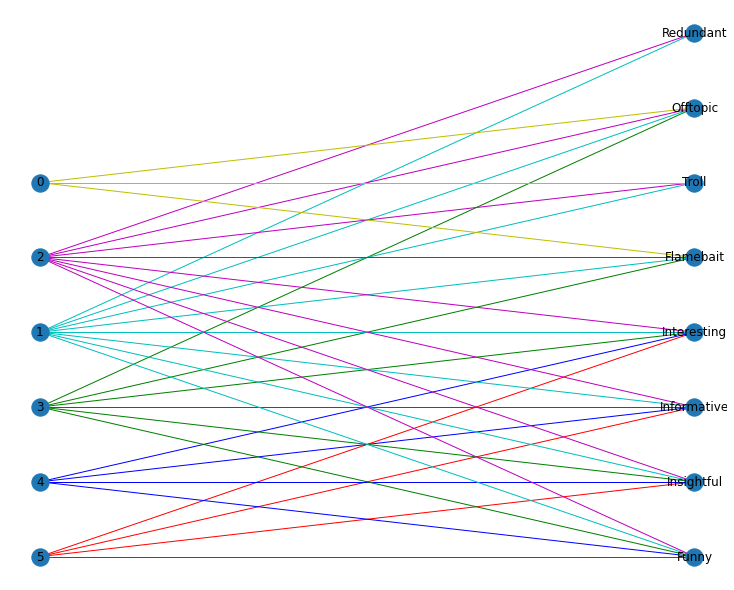

In [66]:
# Plot the graph
pos = {node:[0, i] for i,node in enumerate(dfn1['Score'].unique())}
pos.update({node:[1, i] for i,node in enumerate(dfn1['Category'].unique())})
fig = plt.figure(figsize=(10, 8))
nx.draw(B, pos, with_labels=True, edge_color=edge_colors)
plt.show()

In [45]:
dfn

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday
1,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Friday
9,67718,56553822,2018-05-04 10:59:00,"Yes, there is an alternative",Hemp is a good alternative to concrete. In ad...,697113,5,Funny,Friday
10,56553822,56553934,2018-05-04 11:15:00,"Re:Yes, there is an alternative","HEMP? I got to ask, do you have a pretensione...",2522392,5,Insightful,Friday
11,56553934,56554078,2018-05-04 11:33:00,"Re:Yes, there is an alternative",Turns out there is a product called 'Hempcret...,4808835,5,Informative,Friday
12,56554078,56554136,2018-05-04 11:40:00,"Re:Yes, there is an alternative",Hempcrete will float in a bucket of waterWith...,1198475,4,Insightful,Friday
...,...,...,...,...,...,...,...,...,...
509730,48987949,48988153,2015-02-05 10:09:00,Re:so...,Hep B can be contracted in many ways. The he...,267028,5,Informative,Thursday
509738,48988033,48988165,2015-02-05 10:11:00,"Re:Not 5 vaccines, 7-11","By ""moderate anti-vaxxer"", you mean ""I've got...",3897945,5,Insightful,Thursday
509745,48988033,48988229,2015-02-05 10:18:00,"Re:Not 5 vaccines, 7-11","""I'm a moderate anti-vaxxer""In other words, y...",by Anonymous Cowar,2,Insightful,Thursday
509747,48988555,48989039,2015-02-05 11:35:00,"Re:Not 5 vaccines, 7-11",I can see waiting on Varicella until around a...,by Anonymous Cowar,2,Interesting,Thursday


In [46]:
len(dfn)

70316

In [47]:
dfs = d_comm.pivot_table(index = ['Score'], aggfunc ='size')
dfs

Score
0       136
1     82637
2    330320
3     44361
4     16841
5     33521
dtype: int64

Text(0, 0.5, 'Counts of Comments')

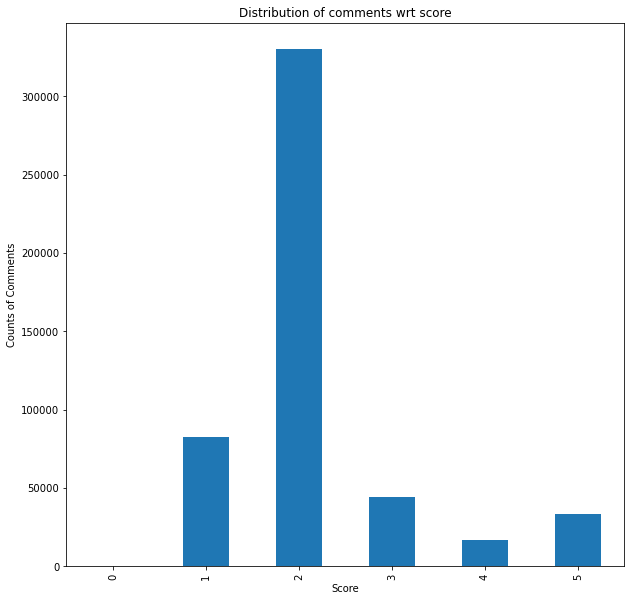

In [48]:
scc =dfs.plot(kind='bar',figsize=(10,10), title = 'Distribution of comments wrt score')
scc.set_xlabel("Score")
scc.set_ylabel("Counts of Comments")

In [49]:
dfn0 = dfn[['Score', 'Category']]
dfn0

,Score,Category
1,5,Funny
9,5,Funny
10,5,Insightful
11,5,Informative
12,4,Insightful
...,...,...
509730,5,Informative
509738,5,Insightful
509745,2,Insightful
509747,2,Interesting


In [50]:
dfn01 =dfn0.groupby(['Category', 'Score']).size().reset_index()
dfn01['percentage']= (dfn01[0] / dfn01.groupby('Category')[0].transform('sum') )*100
dfn01

,Category,Score,0,percentage
0,Flamebait,0,1,0.146843
1,Flamebait,1,400,58.737151
2,Flamebait,2,279,40.969163
3,Flamebait,3,1,0.146843
4,Funny,1,219,2.860128
5,Funny,2,898,11.727831
6,Funny,3,640,8.358365
7,Funny,4,1639,21.405250
8,Funny,5,4261,55.648426
9,Informative,1,389,2.785535


In [51]:
pivot = pd.pivot_table(data=dfn01, index=['Category'], columns=['Score'], values='percentage')
pivot

Score,0,1,2,3,4,5
Category,,,,,,
Flamebait,0.146843,58.737151,40.969163,0.146843,NaN,NaN
Funny,NaN,2.860128,11.727831,8.358365,21.405250,55.648426
Informative,NaN,2.785535,11.535983,9.709989,25.664160,50.304332
Insightful,NaN,3.982219,12.492336,10.980993,22.946045,49.598406
Interesting,NaN,3.191889,13.405933,10.476906,27.825760,45.099512
Offtopic,0.363636,45.454545,52.727273,1.454545,NaN,NaN
Redundant,NaN,42.342342,57.657658,NaN,NaN,NaN
Troll,0.177305,59.869976,39.952719,NaN,NaN,NaN


In [52]:
pivot =pivot.fillna(0)

In [53]:
pivot

Score,0,1,2,3,4,5
Category,,,,,,
Flamebait,0.146843,58.737151,40.969163,0.146843,0.000000,0.000000
Funny,0.000000,2.860128,11.727831,8.358365,21.405250,55.648426
Informative,0.000000,2.785535,11.535983,9.709989,25.664160,50.304332
Insightful,0.000000,3.982219,12.492336,10.980993,22.946045,49.598406
Interesting,0.000000,3.191889,13.405933,10.476906,27.825760,45.099512
Offtopic,0.363636,45.454545,52.727273,1.454545,0.000000,0.000000
Redundant,0.000000,42.342342,57.657658,0.000000,0.000000,0.000000
Troll,0.177305,59.869976,39.952719,0.000000,0.000000,0.000000


(0.0, 150.0)

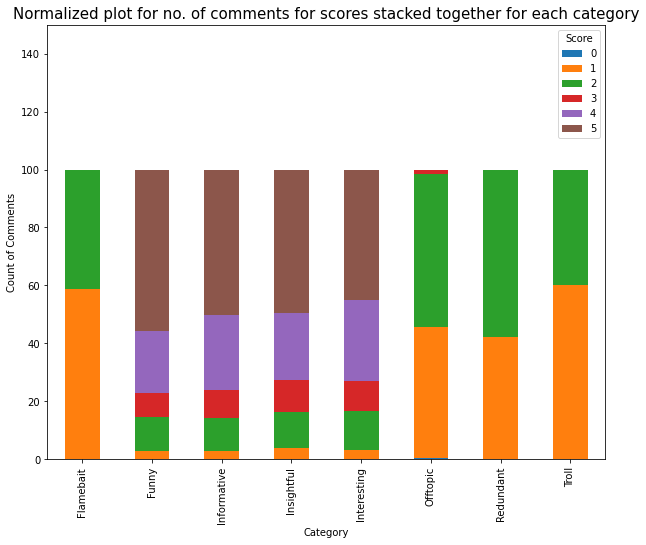

In [54]:
ax = pivot.plot.bar(stacked=True, figsize=(10,8))
ax.set_title('Normalized plot for no. of comments for scores stacked together for each category', fontsize=15)
ax.set_ylabel("Count of Comments")
ax.set_ylim(0,150)

In [55]:
dfa1 =dfa.reset_index()
dfa1 = dfa1.rename(columns={0: 'Count of Comments'})
dfa1

,Author ID,Count of Comments
0,100005,17
1,1000150,1
2,1000167,5
3,10002888,1
4,1000364,1
...,...,...
20398,samzenpus,155
20399,timothy,160
20400,tm,140
20401,twg,11


In [56]:
 test = dfa1.sort_values(['Count of Comments'], ascending=[False])

In [57]:
test.drop(index=test.index[0], axis=0, inplace=True)
test.reset_index(drop=True, inplace=True)

In [58]:
tes1 = test.head(10)
tes1.set_index("Author ID",drop=True,inplace=True)

In [59]:
tes1

,Count of Comments
Author ID,
80593,4965
153816,4630
196126,3984
166417,3822
1787294,3586
622387,3419
598059,3383
4530225,3334
1175323,3028


Text(0, 0.5, 'Counts of Comments')

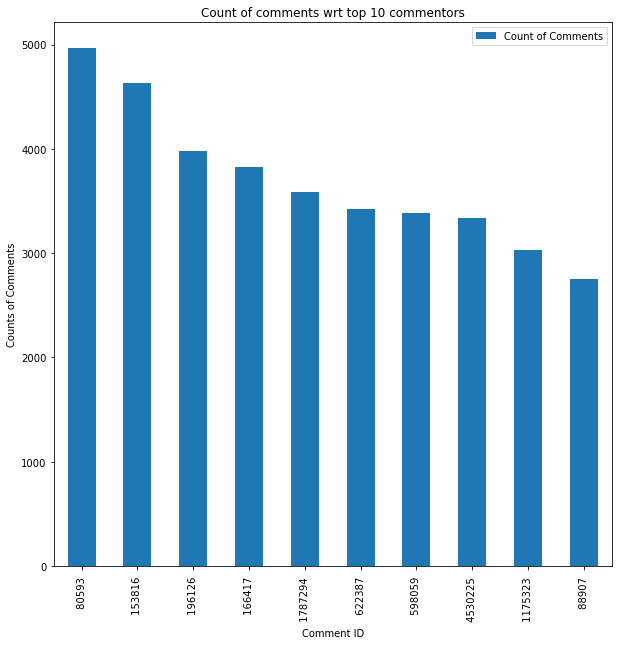

In [60]:
ax1 =tes1.plot(kind='bar',figsize=(10,10), title = 'Count of comments wrt top 10 commentors')
ax1.set_xlabel("Comment ID")
ax1.set_ylabel("Counts of Comments")

In [61]:
dfx =d_comm['Parent ID'].value_counts().reset_index()

In [62]:
dfx.dropna()
dfx

,index,Parent ID
0,14457898,344
1,66243661,340
2,66447393,333
3,66282495,278
4,66391089,272
...,...,...
272525,53665623,1
272526,49034555,1
272527,52292803,1
272528,50849089,1


In [63]:
dfx = dfx.rename(columns={'index': 'Parent ID', 'Parent ID': 'Count'})

In [64]:
dfx

,Parent ID,Count
0,14457898,344
1,66243661,340
2,66447393,333
3,66282495,278
4,66391089,272
...,...,...
272525,53665623,1
272526,49034555,1
272527,52292803,1
272528,50849089,1


In [71]:
d_comm1 = d_comm.dropna()

In [72]:
merged_df = pd.merge(d_comm1, dfx, on="Parent ID", how='inner')

In [73]:
merged_df

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday,Count
0,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Friday,39
1,67718,56553822,2018-05-04 10:59:00,"Yes, there is an alternative",Hemp is a good alternative to concrete. In ad...,697113,5,Funny,Friday,39
2,67718,56553876,2018-05-04 11:04:00,"Why, environmentalists?",Why do you propose changes to make everyone's...,38547,4,Insightful,Friday,39
3,67718,56553938,2018-05-04 11:16:00,Concrete is over-used for convenience,"The crux of the article was Rammed Earth, whi...",3338,5,Informative,Friday,39
4,67718,56553968,2018-05-04 11:19:00,5%,FIVE PERCENT of global CO2 emissions for ceme...,2538558,4,Insightful,Friday,39
...,...,...,...,...,...,...,...,...,...,...
70311,48987949,48988153,2015-02-05 10:09:00,Re:so...,Hep B can be contracted in many ways. The he...,267028,5,Informative,Thursday,3
70312,48988033,48988165,2015-02-05 10:11:00,"Re:Not 5 vaccines, 7-11","By ""moderate anti-vaxxer"", you mean ""I've got...",3897945,5,Insightful,Thursday,6
70313,48988033,48988229,2015-02-05 10:18:00,"Re:Not 5 vaccines, 7-11","""I'm a moderate anti-vaxxer""In other words, y...",by Anonymous Cowar,2,Insightful,Thursday,6
70314,48988555,48989039,2015-02-05 11:35:00,"Re:Not 5 vaccines, 7-11",I can see waiting on Varicella until around a...,by Anonymous Cowar,2,Interesting,Thursday,1


In [74]:
unique_df = merged_df[~merged_df['Parent ID'].duplicated(keep='first')]

In [75]:
unique_df

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday,Count
0,67718,56553764,2018-05-04 10:46:00,Jimmy Hoffa says Yes!,"Can't live with it, can't live inside it.",1488789,5,Funny,Friday,39
12,56553822,56553934,2018-05-04 11:15:00,"Re:Yes, there is an alternative","HEMP? I got to ask, do you have a pretensione...",2522392,5,Insightful,Friday,5
13,56553934,56554078,2018-05-04 11:33:00,"Re:Yes, there is an alternative",Turns out there is a product called 'Hempcret...,4808835,5,Informative,Friday,3
14,56554078,56554136,2018-05-04 11:40:00,"Re:Yes, there is an alternative",Hempcrete will float in a bucket of waterWith...,1198475,4,Insightful,Friday,1
15,56553892,56554008,2018-05-04 11:24:00,Re:If Only,The lime emits CO2 as CaCO3 converts to CaO. ...,3338,5,Informative,Friday,3
...,...,...,...,...,...,...,...,...,...,...
70309,48987853,48987969,2015-02-05 09:43:00,Re:conscientious beliefs... let's break that d...,"con- against, antiNo, ""contra-"" means against...",by Anonymous Cowar,4,Informative,Thursday,3
70310,48987949,48988103,2015-02-05 10:03:00,Re:so...,Imposing the same approach on private schools...,1285,5,Informative,Thursday,3
70312,48988033,48988165,2015-02-05 10:11:00,"Re:Not 5 vaccines, 7-11","By ""moderate anti-vaxxer"", you mean ""I've got...",3897945,5,Insightful,Thursday,6
70314,48988555,48989039,2015-02-05 11:35:00,"Re:Not 5 vaccines, 7-11",I can see waiting on Varicella until around a...,by Anonymous Cowar,2,Interesting,Thursday,1


In [76]:
unique_df.loc[unique_df['Parent ID'] == 66391089]

,Parent ID,Comment ID,Timestamp,Title,Text,Author ID,Score,Category,Weekday,Count
55178,66391089,62912365,2022-09-25 12:39:00,Re: Given California's electricity rates,A lot of Swedish homes have had heat pumps fo...,4260747,5,Informative,Sunday,272


In [77]:
dfy = unique_df[['Category','Count']].copy()

In [78]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42014 entries, 0 to 70315
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  42014 non-null  object
 1   Count     42014 non-null  Int64 
dtypes: Int64(1), object(1)
memory usage: 1.0+ MB


<AxesSubplot:title={'center':'Count'}, xlabel='[Category]'>

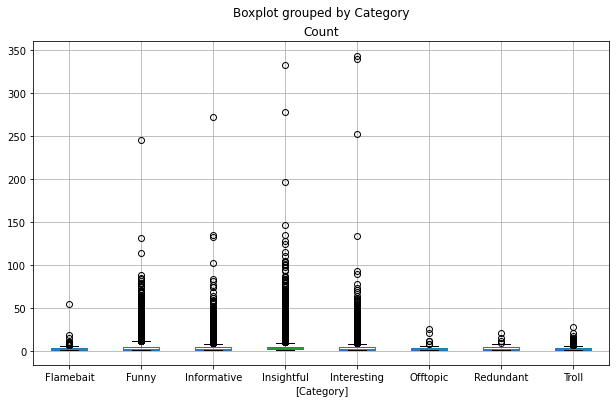

In [79]:
dfy.boxplot(column=['Count'], by=['Category'],figsize=(10, 6),fontsize=10)

<AxesSubplot:title={'center':'Count'}, xlabel='[Score]'>

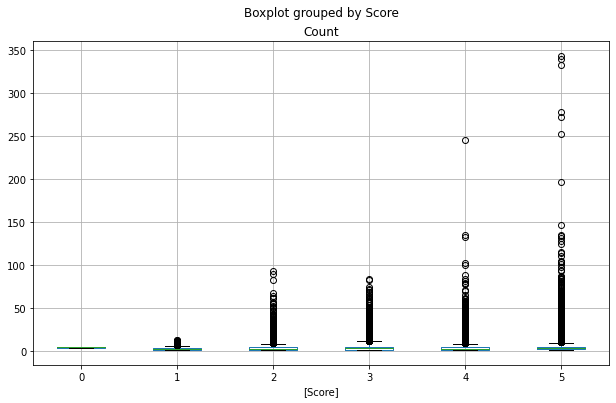

In [80]:
dfz = unique_df[['Score','Count']].copy()
dfz.boxplot(column=['Count'], by=['Score'],figsize=(10, 6),fontsize=10)